# ACCT655 – Analytics for Financial Instruments (Term 3, AY 2020/21) <br> Group Project

#### Members: 
1) Goh Li Jie (Team Lead) <br>
2) Guo Yi (Flim Director) <br>
3) Joshua Lim Zhenhui (Crypto Master) <br>
4) Lim Huey Fang (Research Head) <br>
5) Lai Han-Wen, Rainer (Mr. Robot) <br>
6) Wang Wei (ESG Head Advisor) <br>

## <u> Hypothesis </u>: <br> - High ESG portfolio yield higher returns than Low ESG portfolio <br> - To also view the impact of COVID on the returns


### Import the relevant libraries

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns

from pandas_datareader import data as pdr
import yfinance as yf
 
yf.pdr_override()

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

### 1. Specify the starting and ending dates for the time series & Calculate Average Risk Free rate
(run <u> either</u> Period 1 or Period 2)

### Project main research area: 
#### 1.1 Period 1: Aug 11 - Dec 19 

In [2]:
# Period 1: excluding COVID-19 which started around late Dec 2019
start = datetime(2011, 8, 1)
end = datetime(2019, 12, 31) 


# Read 'DGS10_Dec19.csv' data for 10-year US treasury rates -> https://fred.stlouisfed.org/series/DGS10
rfdf = pd.read_csv("DGS10_Dec19.csv")

# Remove all '.' information from non-trading days
rfdf = rfdf[rfdf.DGS10 != '.']

# Remove NaN (ie empty cells in csv)
rfdf = rfdf.dropna()


# Display to ensure dataset period is aligned to Simulation period 
display(rfdf.head())
display(rfdf.tail())
print('\n')

,DATE,DGS10
0,01-08-11,2.77
1,02-08-11,2.66
2,03-08-11,2.64
3,04-08-11,2.47
4,05-08-11,2.58


,DATE,DGS10
2191,24-12-19,1.9
2193,26-12-19,1.9
2194,27-12-19,1.88
2195,30-12-19,1.9
2196,31-12-19,1.92


In [3]:
# Convert all data in 'DGS10' column to numeric data
rfdf = rfdf[['DGS10']].apply(pd.to_numeric)


# Calculate Average Risk Free Rate, rf
# based on the whole period
rf = rfdf['DGS10'].mean() / 100
print("Average risk free rate:", round(rf, 4))

Average risk free rate: 0.0225



#### 1.2 Period 2: Aug 11 - Jul 21 (inclusive of COVID-19) <br> - please refer to AFI Group Project - Codes (incl COVID) to run this code chunk.

### 2. Define Risk Aversion Coefficients (A)

In [4]:
# Risk aversion levels
# [LOW,MID,HIGH]
A = [6,8,10]


#  Note: These are abritrary numbers. 
#  Team noted that these set of numbers ensure that risk free is considered and
#  will reflect the moving in weights between risk free and risky portfolio.

### 3. Assign selected assets class and selected securities into respective portfolios <br>
#### We have shortlisted 8 securities across 4 industries:
a) Technology <br>
b) Entertainment <br>
c) Energy <br>
d) Real Estate <br>
- We have also included a risk hedging asset in both portfolios to manage the portfolio systemic risk (i.e. VIXM)

#### 3.1 Components of High ESG Portfolio

In [5]:
# High ESG Portfolio: CSCO,DIS,ICLN,EQIX,VIXM
# a) CSCO --> technology
# b) DIS --> entertainment
# c) ICLN --> energy
# d) EQIX --> real estate

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

hesg_list = ['CSCO','DIS','ICLN','EQIX','VIXM']

hesgstocks_dict = {}

for i in hesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    hesgstocks_dict[i] =  locals()[i]['Adj Close']  
    
hesgstocks = pd.DataFrame(hesgstocks_dict)
display(hesgstocks.head())
display(hesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CSCO,DIS,ICLN,EQIX,VIXM
Date,,,,,
2011-08-01,11.757895,33.848602,11.323566,84.339371,234.000000
2011-08-02,11.483077,32.554188,10.950777,80.288170,240.759995
2011-08-03,11.505359,32.959248,10.880878,80.951218,239.080002
2011-08-04,11.007710,31.127684,10.065396,76.139908,261.119995
2011-08-05,11.096842,30.977993,10.042093,74.514610,263.040009


,CSCO,DIS,ICLN,EQIX,VIXM
Date,,,,,
2019-12-23,45.482357,144.679993,11.573418,556.432983,21.110001
2019-12-24,45.179775,145.289993,11.603068,557.990417,21.080000
2019-12-26,45.245968,145.699997,11.672252,564.093628,21.020000
2019-12-27,45.170319,145.750000,11.632718,567.004089,21.280001
2019-12-30,45.000114,143.770004,11.573418,564.804199,21.750000


#### 3.2 Components of Low ESG Portfolio

In [6]:
# Low ESG Portfolio: FTNT,NFLX,MCHI,SBAC,VIXM
# a) FTNT --> technology
# b) NFLX --> entertainment
# c) MCHI --> energy
# d) SBAC--> real estate

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

lesg_list = ['FTNT','NFLX','MCHI','SBAC','VIXM']

lesgstocks_dict = {}

for i in lesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    lesgstocks_dict[i] =  locals()[i]['Adj Close'] 
    
lesgstocks = pd.DataFrame(lesgstocks_dict)
display(lesgstocks.head())
display(lesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FTNT,NFLX,MCHI,SBAC,VIXM
Date,,,,,
2011-08-01,20.240000,37.625713,40.993233,37.818192,234.000000
2011-08-02,20.129999,36.742859,40.716988,36.823502,240.759995
2011-08-03,21.080000,37.142857,39.955208,38.379562,239.080002
2011-08-04,20.799999,35.110001,38.833492,35.750011,261.119995
2011-08-05,19.620001,34.444286,37.669918,35.040932,263.040009


,FTNT,NFLX,MCHI,SBAC,VIXM
Date,,,,,
2019-12-23,107.820000,333.100006,62.726299,237.662247,21.110001
2019-12-24,107.779999,333.200012,62.765766,237.207855,21.080000
2019-12-26,108.239998,332.630005,63.328110,238.304291,21.020000
2019-12-27,107.449997,329.089996,63.407032,238.452438,21.280001
2019-12-30,106.949997,323.309998,63.140663,235.568237,21.750000


### 4. Quantitative Analysis

#### Set Portfolio parameters

In [7]:
# Specify Number of Assets per Portfolio, Number of Repetitions
num_assets = 5
num_portfolios = 50000

#### 4.1 Comparative Analysis of High ESG portfolio vs Low ESG portfolio
#### (a) HIGH ESG <br> (b) LOW ESG

#### (i) Compute:
1) Returns <br> 
2) Standard Deviation (SD) <br> 
3) Covariance <br> 
4) Correlation <br> 
5) Skewness <br> 
6) Kurtosis

#### (ii) Plot Frontier with Minimum Variance and Max Sharpe Ratio Portfolios

#### 4.1 (a)(i) HIGH ESG: Compute Statistics, Covariance and Correlation

In [8]:
#%% HIGH ESG --- Returns, S.D, Cov, Correlation, Skewness, Kurtosis Info ---

print('\n')
print('-=HIGH ESG PORTFOLIO w/o SPY=-')   
print('\n')

stocks = hesgstocks
selected = hesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=HIGH ESG PORTFOLIO w/o SPY=-


Annual Return:
CSCO    0.1888
DIS     0.1939
ICLN    0.0283
EQIX    0.2596
VIXM   -0.2375
dtype: float64


Annual Std Dev:
CSCO    0.2412
DIS     0.2081
ICLN    0.2266
EQIX    0.2580
VIXM    0.3018
dtype: float64


Variance-Covariance Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM
CSCO  0.0582  0.0218  0.0257  0.0205 -0.0379
DIS   0.0218  0.0433  0.0225  0.0192 -0.0343
ICLN  0.0257  0.0225  0.0513  0.0245 -0.0396
EQIX  0.0205  0.0192  0.0245  0.0666 -0.0342
VIXM -0.0379 -0.0343 -0.0396 -0.0342  0.0911


Correlation Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM
CSCO  1.0000  0.4350  0.4703  0.3301 -0.5206
DIS   0.4350  1.0000  0.4762  0.3571 -0.5468
ICLN  0.4703  0.4762  1.0000  0.4199 -0.5786
EQIX  0.3301  0.3571  0.4199  1.0000 -0.4388
VIXM -0.5206 -0.5468 -0.5786 -0.4388  1.0000


Skewness:
CSCO    0.8144
DIS    -0.2598
ICLN   -0.2633
EQIX    0.3475
VIXM    1.8032
dtype: float64


Kurtosis:
CSCO   -0.4163
DIS    -0.6934
ICLN   -0.1007
E

#### 4.1 (a)(ii) HIGH ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [9]:
#%% HIGH ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

    
# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight
0,0.0668,0.0966,0.4589,0.2808,0.1154,0.0915,0.2223,0.2901
1,0.1084,0.1255,0.6847,0.1429,0.3311,0.2312,0.1624,0.1324
2,0.0709,0.1084,0.4466,0.1743,0.3704,0.2228,0.0303,0.2022
3,0.0886,0.1082,0.6115,0.3418,0.0845,0.0813,0.2462,0.2463
4,0.0825,0.1048,0.5720,0.1791,0.2398,0.2045,0.1725,0.2040


,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight
49995,0.1186,0.1323,0.7268,0.2363,0.0574,0.1795,0.3680,0.1589
49996,0.0868,0.1133,0.5678,0.2593,0.1273,0.2254,0.1990,0.1890
49997,0.0932,0.1036,0.6821,0.2319,0.2367,0.1161,0.1988,0.2165
49998,0.1023,0.1460,0.5470,0.0241,0.3550,0.3826,0.1502,0.0881
49999,0.0635,0.1038,0.3954,0.3555,0.0291,0.0805,0.2323,0.3025


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [10]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (High ESG only w/o SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (High ESG only w/o SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
hesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
hesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])


# Assign new variables for subsequent coding
hesg_stats_minvar = min_variance_port
hesg_stats_sharpe = sharpe_portfolio


Minimum Variance Portfolio (High ESG only w/o SPY):
               48520
Returns       0.0179
Volatility    0.0850
Sharpe Ratio -0.0537
CSCO weight   0.1554
DIS weight    0.1923
ICLN weight   0.1999
EQIX weight   0.1068
VIXM weight   0.3456


Optimal Portfolio (High ESG only w/o SPY):
                6405
Returns       0.2191
Volatility    0.1817
Sharpe Ratio  1.0817
CSCO weight   0.2081
DIS weight    0.3305
ICLN weight   0.0012
EQIX weight   0.4526
VIXM weight   0.0077


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

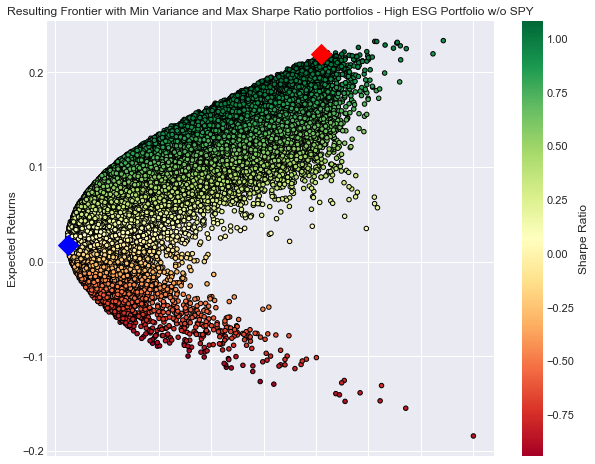

In [11]:
#%% HIGH ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max Sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - High ESG Portfolio w/o SPY')

plt.show();


#### 4.1 (b)(i) LOW ESG: Compute Statistics, Covariance and Correlation

In [12]:
#%% LOW ESG --- Returns, S.D, Cov, Correlation, Skewness, Kurtosis Info ---

print('\n')
print('-=LOW ESG PORTFOLIO w/o SPY=-')    
print('\n')

stocks = lesgstocks
selected = lesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
      
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')

      
# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')

      
# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=LOW ESG PORTFOLIO w/o SPY=-


Annual Return:
FTNT    0.2675
NFLX    0.3906
MCHI    0.0788
SBAC    0.2405
VIXM   -0.2375
dtype: float64


Annual Std Dev:
FTNT    0.3714
NFLX    0.5199
MCHI    0.2340
SBAC    0.2130
VIXM    0.3018
dtype: float64


Variance-Covariance Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM
FTNT  0.1380  0.0375  0.0298  0.0209 -0.0439
NFLX  0.0375  0.2703  0.0322  0.0210 -0.0478
MCHI  0.0298  0.0322  0.0548  0.0179 -0.0411
SBAC  0.0209  0.0210  0.0179  0.0454 -0.0265
VIXM -0.0439 -0.0478 -0.0411 -0.0265  0.0911


Correlation Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM
FTNT  1.0000  0.1943  0.3430  0.2647 -0.3918
NFLX  0.1943  1.0000  0.2650  0.1895 -0.3048
MCHI  0.3430  0.2650  1.0000  0.3599 -0.5825
SBAC  0.2647  0.1895  0.3599  1.0000 -0.4126
VIXM -0.3918 -0.3048 -0.5825 -0.4126  1.0000


Skewness:
FTNT    1.2587
NFLX    0.8763
MCHI    0.6083
SBAC    0.7561
VIXM    1.8032
dtype: float64


Kurtosis:
FTNT    0.4858
NFLX   -0.6130
MCHI   -0.7680
SB

#### 4.1 (b)(ii) LOW ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [13]:
#%% LOW ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight
0,0.1120,0.1340,0.6680,0.2808,0.1154,0.0915,0.2223,0.2901
1,0.1934,0.2090,0.8177,0.1429,0.3311,0.2312,0.1624,0.1324
2,0.1681,0.2165,0.6727,0.1743,0.3704,0.2228,0.0303,0.2022
3,0.1316,0.1477,0.7385,0.3418,0.0845,0.0813,0.2462,0.2463
4,0.1508,0.1646,0.7795,0.1791,0.2398,0.2045,0.1725,0.2040


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight
49995,0.1505,0.1424,0.8991,0.2363,0.0574,0.1795,0.3680,0.1589
49996,0.1398,0.1484,0.7907,0.2593,0.1273,0.2254,0.1990,0.1890
49997,0.1601,0.1671,0.8231,0.2319,0.2367,0.1161,0.1988,0.2165
49998,0.1905,0.2273,0.7393,0.0241,0.3550,0.3826,0.1502,0.0881
49999,0.0968,0.1408,0.5280,0.3555,0.0291,0.0805,0.2323,0.3025


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [14]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (Low ESG only w/o SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (Low ESG only w/o SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
lesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
lesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# Assign new variables for subsequent coding
lesg_stats_sharpe = sharpe_portfolio
lesg_stats_minvar = min_variance_port

Minimum Variance Portfolio (Low ESG only w/o SPY):
               23099
Returns       0.0270
Volatility    0.0956
Sharpe Ratio  0.0476
FTNT weight   0.0742
NFLX weight   0.0304
MCHI weight   0.3086
SBAC weight   0.2309
VIXM weight   0.3560


Optimal Portfolio (Low ESG only w/o SPY):
               14002
Returns       0.2684
Volatility    0.2067
Sharpe Ratio  1.1899
FTNT weight   0.1689
NFLX weight   0.1741
MCHI weight   0.0094
SBAC weight   0.6449
VIXM weight   0.0027


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

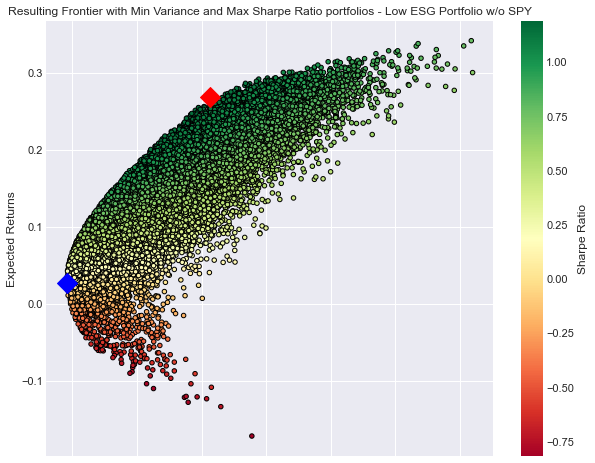

In [15]:
#%% LOW ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max Sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - Low ESG Portfolio w/o SPY')

plt.show();


#### 4.2 Portfolio Optimisation and Sensitivity Analysis
- 2-Assets Optimiser (i.e. Complete portfolio = Optimal Risky Portfolio + Risk Free Asset) <br>  
- Optimal Risky Portfolio = Max Sharpe Ratio Portfolio

#### (a) HIGH ESG <br> (b) LOW ESG



#### Perform sensitivity analysis on different degree of risk aversion: <br> (1) Low <br> (2) Mid <br> (3) High

In [16]:
# call out Risk Aversion set earlier
# [Low, Mid, High]
print('Risk aversion levels (Low, Mid, High):', A)
print('\n')

# Call out risk free rate defined earlier
print("Average risk free rate:", round(rf, 4))

Risk aversion levels (Low, Mid, High): [6, 8, 10]


Average risk free rate: 0.0225


#### 4.2 (a) HIGH ESG: 2-Assets Optimiser

In [17]:
#%% 2-Asset Optimizer [HESG (Max Sharpe) with risk free] 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(hesg_stats_sharpe['Returns'])
std_dev_p = float(hesg_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required
# round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)
    
    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)     

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level   
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}

#### Obtain Max Utility for various risk aversion levels

In [18]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1201


Max utility for Risk aversion (Mid): 0.0957


Max utility for Risk aversion (High): 0.0811


#### Compute risk premium of Max Sharpe Ratio Portfolio (High ESG)

In [19]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.1966


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio
- Weight in respective securities

##### 4.2 (a) (1) HIGH ESG: 2-Assets Optimiser with Low Risk Aversion

In [20]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 
    
    
# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)

Weight in risky portfolio (Low A): 0.9921
Weight in risk free asset (Low A): 0.0079


Expected return of Complete Portfolio (Low A): 0.2175
SD of Complete Portfolio (Low A): 0.1803
Sharpe Ratio of Complete Portfolio (Low A): 1.0817


,Weight in Complete Portfolio (Low A)
CSCO,0.2064
DIS,0.3278
ICLN,0.0012
EQIX,0.4491
VIXM,0.0076


##### 4.2 (a) (2) HIGH ESG: 2-Assets Optimiser with Mid Risk Aversion

In [21]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 
    
# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return    
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)
      
# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)
      
# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.744
Weight in risk free asset (Mid A): 0.256


Expected return of Complete Portfolio (Mid A): 0.1687
SD of Complete Portfolio (Mid A): 0.1352
Sharpe Ratio of Complete Portfolio (Mid A): 1.0815


,Weight in Complete Portfolio (Mid A)
CSCO,0.1548
DIS,0.2459
ICLN,0.0009
EQIX,0.3368
VIXM,0.0057


##### 4.2 (a) (3) HIGH ESG: 2-Assets Optimiser with High Risk Aversion

In [22]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1

print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)


# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')

# Expected Return   
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.5952
Weight in risk free asset (High A): 0.4048


Expected return of Complete Portfolio (High A): 0.1395
SD of Complete Portfolio (High A): 0.1082
Sharpe of Complete Portfolio (High A): 1.0815


,Weight in Complete Portfolio (High A)
CSCO,0.1239
DIS,0.1967
ICLN,0.0007
EQIX,0.2694
VIXM,0.0046


In [23]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
hesg_2asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(hesg_2asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('High ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 


High ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0811,0.0957,0.1201
weight_risky_portfolio,0.5952,0.7440,0.9921
weight_risk_free,0.4048,0.2560,0.0079
return,0.1395,0.1687,0.2175
standard_deviation,0.1082,0.1352,0.1803
sharpe_ratio,1.0815,1.0815,1.0817


#### 4.2 (b) LOW ESG: 2-Assets Optimiser

In [24]:
#%% 2-Asset Optimizer [LESG (Max Sharpe) with risk free] 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(lesg_stats_sharpe['Returns'])
std_dev_p = float(lesg_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)

    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)
    
    
# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level  
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}

#### Obtain Max Utility for various risk aversion levels

In [25]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1405


Max utility for Risk aversion (Mid): 0.1111


Max utility for Risk aversion (High): 0.0934


#### Compute risk premium of Max Sharpe Ratio Portfolio (Low ESG)

In [26]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.2459


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 4.2 (b) (1) LOW ESG: 2-Assets Optimiser with Low Risk Aversion

In [27]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)

Weight in risky portfolio (Low A): 0.9595
Weight in risk free asset (Low A): 0.0405


Expected return of Complete Portfolio (Low A): 0.2585
SD of Complete Portfolio (Low A): 0.1983
Sharpe Ratio of Complete Portfolio (Low A): 1.1902


,Weight in Complete Portfolio (Low A)
FTNT,0.1621
NFLX,0.1671
MCHI,0.0090
SBAC,0.6188
VIXM,0.0026


##### 4.2 (b) (2) LOW ESG: 2-Assets Optimiser with Mid Risk Aversion

In [28]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.7196
Weight in risk free asset (Mid A): 0.2804


Expected return of Complete Portfolio (Mid A): 0.1995
SD of Complete Portfolio (Mid A): 0.1487
Sharpe Ratio of Complete Portfolio (Mid A): 1.1905


,Weight in Complete Portfolio (Mid A)
FTNT,0.1216
NFLX,0.1253
MCHI,0.0067
SBAC,0.4641
VIXM,0.0019


##### 4.2 (b) (3) LOW ESG: 2-Assets Optimiser with High Risk Aversion

In [29]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1
    
print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')

# Expected Return   
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.5757
Weight in risk free asset (High A): 0.4243


Expected return of Complete Portfolio (High A): 0.1641
SD of Complete Portfolio (High A): 0.119
Sharpe of Complete Portfolio (High A): 1.1901


,Weight in Complete Portfolio (High A)
FTNT,0.0973
NFLX,0.1003
MCHI,0.0054
SBAC,0.3713
VIXM,0.0016


In [30]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
lesg_2asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(lesg_2asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('Low ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 


Low ESG Portfolio w/o SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0934,0.1111,0.1405
weight_risky_portfolio,0.5757,0.7196,0.9595
weight_risk_free,0.4243,0.2804,0.0405
return,0.1641,0.1995,0.2585
standard_deviation,0.1190,0.1487,0.1983
sharpe_ratio,1.1901,1.1905,1.1902


### 5. Assign selected assets class and selected securities into respective portfolios <br>
- Risky portfolio = risky portfolio identified in Section 3 + market portfolio (i.e. S&P500 'SPY')

#### From Section 3, we have shortlisted 8 securities across 4 industries, then include Market Portfolio:
a) Technology <br>
b) Entertainment <br>
c) Energy <br>
d) Real Estate <br>
e) Market Index
- We have also included a risk hedging asset in both portfolios to manage the portfolio systemic risk (i.e. VIXM)



#### 5.1 Components of High ESG Portfolio

In [31]:
# High ESG Portfolio: CSCO,DIS,ICLN,EQIX,VIXM,SPY
# a) CSCO --> technology
# b) DIS --> entertainment
# c) ICLN --> energy
# d) EQIX --> real estate
# e) SPY --> market index

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

hesg_list = ['CSCO','DIS','ICLN','EQIX','VIXM','SPY']

hesgstocks_dict = {}

for i in hesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    hesgstocks_dict[i] =  locals()[i]['Adj Close']  
    
hesgstocks = pd.DataFrame(hesgstocks_dict)
display(hesgstocks.head())
display(hesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CSCO,DIS,ICLN,EQIX,VIXM,SPY
Date,,,,,,
2011-08-01,11.757897,33.848610,11.323570,84.339371,234.000000,105.489105
2011-08-02,11.483076,32.554188,10.950777,80.288177,240.759995,102.794113
2011-08-03,11.505359,32.959251,10.880877,80.951248,239.080002,103.351120
2011-08-04,11.007708,31.127689,10.065393,76.139923,261.119995,98.510017
2011-08-05,11.096842,30.977993,10.042095,74.514603,263.040009,98.362541


,CSCO,DIS,ICLN,EQIX,VIXM,SPY
Date,,,,,,
2019-12-23,45.482361,144.679993,11.573417,556.432983,21.110001,312.276520
2019-12-24,45.179775,145.289993,11.603067,557.990479,21.080000,312.286255
2019-12-26,45.245964,145.699997,11.672252,564.093628,21.020000,313.948608
2019-12-27,45.170326,145.750000,11.632717,567.004089,21.280001,313.870789
2019-12-30,45.000114,143.770004,11.573417,564.804199,21.750000,312.140350


#### 5.2 Components of Low ESG Portfolio

In [32]:
# Low ESG Portfolio: FTNT,NFLX,MCHI,SBAC,VIXM,SPY
# a) FTNT --> technology
# b) NFLX --> entertainment
# c) MCHI --> energy
# d) SBAC--> real estate
# e) SPY --> market index

####### Risk Hedging Asset: VIXM (VIX MID-TERM FUTURES ETF) ######

lesg_list = ['FTNT','NFLX','MCHI','SBAC','VIXM','SPY']

lesgstocks_dict = {}

for i in lesg_list:        
    locals()[i] = pdr.get_data_yahoo(i, start, end) 
    lesgstocks_dict[i] =  locals()[i]['Adj Close'] 
    
lesgstocks = pd.DataFrame(lesgstocks_dict)
display(lesgstocks.head())
display(lesgstocks.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FTNT,NFLX,MCHI,SBAC,VIXM,SPY
Date,,,,,,
2011-08-01,20.240000,37.625713,40.993233,37.818199,234.000000,105.489098
2011-08-02,20.129999,36.742859,40.716984,36.823502,240.759995,102.794121
2011-08-03,21.080000,37.142857,39.955212,38.379559,239.080002,103.351151
2011-08-04,20.799999,35.110001,38.833492,35.750019,261.119995,98.509995
2011-08-05,19.620001,34.444286,37.669903,35.040924,263.040009,98.362541


,FTNT,NFLX,MCHI,SBAC,VIXM,SPY
Date,,,,,,
2019-12-23,107.820000,333.100006,62.726299,237.662247,21.110001,312.276520
2019-12-24,107.779999,333.200012,62.765762,237.207870,21.080000,312.286255
2019-12-26,108.239998,332.630005,63.328114,238.304276,21.020000,313.948639
2019-12-27,107.449997,329.089996,63.407028,238.452469,21.280001,313.870819
2019-12-30,106.949997,323.309998,63.140663,235.568237,21.750000,312.140411


### 6. Quantitative Analysis

#### Set Portfolio parameters 

In [33]:
# Specify Number of Assets per Portfolio, Number of Repetitions
num_assets = 6
num_portfolios = 50000

#### 6.1 Comparative Analysis of High ESG portfolio vs Low ESG portfolio
#### (a) HIGH ESG <br> (b) LOW ESG

#### (i) Compute:
1) Returns <br> 
2) Standard Deviation (SD) <br> 
3) Covariance <br> 
4) Correlation <br> 
5) Beta <br>
6) Skewness <br> 
7) Kurtosis

#### (ii) Plot Frontier with Minimum Variance and Max Sharpe Ratio Portfolios

#### 6.1 (a)(i) HIGH ESG: Compute Statistics, Covariance, Correlation, Beta

In [34]:
#%% HIGH ESG --- Returns, S.D, Cov, Correlation, Beta, Skewness, Kurtosis Info ---

print('\n')
print('-=HIGH ESG PORTFOLIO w SPY=-')   
print('\n')

stocks = hesgstocks
selected = hesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix and Beta
# Correlation matrix 
corr = daily_simple_returns.corr()

# Beta
# create a new column in Correlation matrix
corr['BETA'] = 0.0

for i in range(0,corr["BETA"].count()):
    corr.iat[i,6] = corr.iat[i,5] * (annual_std_dev[i] / annual_std_dev[5])

print('Correlation Matrix and Beta:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=HIGH ESG PORTFOLIO w SPY=-


Annual Return:
CSCO    0.1888
DIS     0.1939
ICLN    0.0283
EQIX    0.2596
VIXM   -0.2375
SPY     0.1395
dtype: float64


Annual Std Dev:
CSCO    0.2412
DIS     0.2081
ICLN    0.2266
EQIX    0.2580
VIXM    0.3018
SPY     0.1438
dtype: float64


Variance-Covariance Matrix:
        CSCO     DIS    ICLN    EQIX    VIXM     SPY
CSCO  0.0582  0.0218  0.0257  0.0205 -0.0379  0.0229
DIS   0.0218  0.0433  0.0225  0.0192 -0.0343  0.0202
ICLN  0.0257  0.0225  0.0513  0.0245 -0.0396  0.0233
EQIX  0.0205  0.0192  0.0245  0.0666 -0.0342  0.0198
VIXM -0.0379 -0.0343 -0.0396 -0.0342  0.0911 -0.0348
SPY   0.0229  0.0202  0.0233  0.0198 -0.0348  0.0207


Correlation Matrix and Beta:
        CSCO     DIS    ICLN    EQIX    VIXM     SPY    BETA
CSCO  1.0000  0.4350  0.4703  0.3301 -0.5206  0.6596  1.1064
DIS   0.4350  1.0000  0.4762  0.3571 -0.5468  0.6743  0.9758
ICLN  0.4703  0.4762  1.0000  0.4199 -0.5786  0.7136  1.1241
EQIX  0.3301  0.3571  0.4199  1.0000 -0.4388  0.

#### 6.1 (a)(ii) HIGH ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [35]:
#%% HIGH ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))

,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight,SPY weight
0,0.0774,0.0924,0.5943,0.2399,0.0986,0.0781,0.1899,0.2478,0.1457
1,0.1256,0.1308,0.7885,0.2716,0.1897,0.1332,0.1086,0.0950,0.2019
2,0.1397,0.1492,0.7860,0.2201,0.0300,0.1998,0.3704,0.0916,0.0881
3,0.0915,0.1036,0.6661,0.1369,0.1370,0.1634,0.2188,0.1866,0.1574
4,0.1120,0.1239,0.7227,0.2822,0.1261,0.1413,0.0892,0.1147,0.2465


,Returns,Volatility,Sharpe Ratio,CSCO weight,DIS weight,ICLN weight,EQIX weight,VIXM weight,SPY weight
49995,0.1766,0.1661,0.9275,0.1491,0.1041,0.1317,0.3483,0.0083,0.2586
49996,0.0796,0.0885,0.6457,0.0950,0.1837,0.0912,0.1964,0.2335,0.2003
49997,0.0521,0.0926,0.3206,0.1016,0.4405,0.0302,0.0048,0.3012,0.1217
49998,0.1109,0.1115,0.7932,0.3105,0.2457,0.0367,0.1075,0.1753,0.1242
49999,0.0990,0.1235,0.6194,0.3011,0.0863,0.2166,0.1450,0.1416,0.1095


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [36]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (High ESG w SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (High ESG w SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
hesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
hesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])


# Assign new variables for subsequent coding
hesgwspy_stats_minvar = min_variance_port
hesgwspy_stats_sharpe = sharpe_portfolio

Minimum Variance Portfolio (High ESG w SPY):
               13034
Returns       0.0152
Volatility    0.0622
Sharpe Ratio -0.1173
CSCO weight   0.0040
DIS weight    0.0024
ICLN weight   0.0620
EQIX weight   0.0078
VIXM weight   0.3149
SPY weight    0.6089


Optimal Portfolio (High ESG w SPY):
               18013
Returns       0.2069
Volatility    0.1718
Sharpe Ratio  1.0736
CSCO weight   0.2194
DIS weight    0.3525
ICLN weight   0.0037
EQIX weight   0.3508
VIXM weight   0.0114
SPY weight    0.0622


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

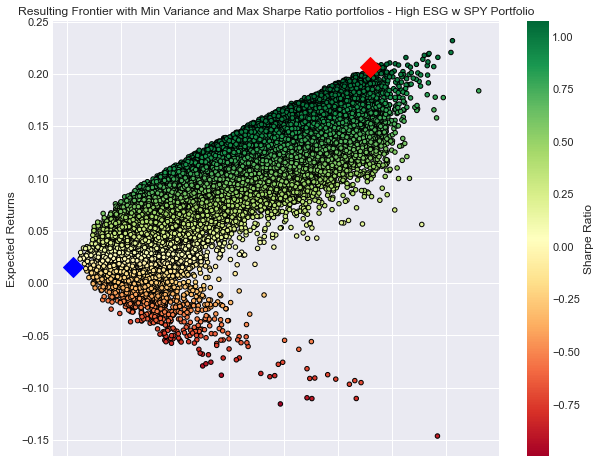

In [37]:
#%% HIGH ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - High ESG w SPY Portfolio')

plt.show();


#### 6.1 (b)(i) LOW ESG: Compute Statistics, Covariance, Correlation, Beta

In [38]:
#%% LOW ESG --- Returns, S.D, Cov, Correlation, Beta, Skewness, Kurtosis Info ---

print('\n')
print('-=LOW ESG PORTFOLIO w SPY=-')    
print('\n')

stocks = lesgstocks
selected = lesg_list

# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(round(annual_returns, 4))
print('\n')
  
    
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev:')
print(round(annual_std_dev, 4))
print('\n')


# Computing variance-covariance matrix with .cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252
print('Variance-Covariance Matrix:')
print(round(cov_matrix, 4))
print('\n')


# Compute and print Correlation matrix and Beta
# Correlation matrix 
corr = daily_simple_returns.corr()

# Beta
# create a new column in Correlation matrix
corr['BETA'] = 0.0
for i in range(0,corr["BETA"].count()):
    corr.iat[i,6] = corr.iat[i,5] * (annual_std_dev[i] / annual_std_dev[5])

print('Correlation Matrix and Beta:')
print(round(corr, 4))
print('\n')


# Compute Skewness
skew = round(stocks.skew(),4)
print('Skewness:')
print(skew)
print('\n')


# Compute Kurtosis
kurtosis = round(stocks.kurtosis(),4)
print('Kurtosis:')
print(kurtosis)
print('\n')



-=LOW ESG PORTFOLIO w SPY=-


Annual Return:
FTNT    0.2675
NFLX    0.3906
MCHI    0.0788
SBAC    0.2405
VIXM   -0.2375
SPY     0.1395
dtype: float64


Annual Std Dev:
FTNT    0.3714
NFLX    0.5199
MCHI    0.2340
SBAC    0.2130
VIXM    0.3018
SPY     0.1438
dtype: float64


Variance-Covariance Matrix:
        FTNT    NFLX    MCHI    SBAC    VIXM     SPY
FTNT  0.1380  0.0375  0.0298  0.0209 -0.0439  0.0257
NFLX  0.0375  0.2703  0.0322  0.0210 -0.0478  0.0271
MCHI  0.0298  0.0322  0.0548  0.0179 -0.0411  0.0227
SBAC  0.0209  0.0210  0.0179  0.0454 -0.0265  0.0153
VIXM -0.0439 -0.0478 -0.0411 -0.0265  0.0911 -0.0348
SPY   0.0257  0.0271  0.0227  0.0153 -0.0348  0.0207


Correlation Matrix and Beta:
        FTNT    NFLX    MCHI    SBAC    VIXM     SPY    BETA
FTNT  1.0000  0.1943  0.3430  0.2647 -0.3918  0.4805  1.2410
NFLX  0.1943  1.0000  0.2650  0.1895 -0.3048  0.3628  1.3113
MCHI  0.3430  0.2650  1.0000  0.3599 -0.5825  0.6752  1.0985
SBAC  0.2647  0.1895  0.3599  1.0000 -0.4126  0.4

#### 6.1 (b)(ii) LOW ESG: Plotting Frontier of Portfolios

#### Simulate portfolios:

In [39]:
#%% LOW ESG --- Dataframe creation for Frontier plotting of Portfolios ---

# Set seed for random component used subsequently
np.random.seed(123)


# Create empty lists to store returns, volatility, sharpe ratio and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(np.dot(weights, cov_matrix), weights.T)
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)

    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility,
                 'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accommodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
    #   print(counter, symbol)

df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

display(round(df.head(), 4))
display(round(df.tail(), 4))


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight,SPY weight
0,0.1160,0.1223,0.7645,0.2399,0.0986,0.0781,0.1899,0.2478,0.1457
1,0.1890,0.1823,0.9134,0.2716,0.1897,0.1332,0.1086,0.0950,0.2019
2,0.1660,0.1528,0.9393,0.2201,0.0300,0.1998,0.3704,0.0916,0.0881
3,0.1333,0.1267,0.8747,0.1369,0.1370,0.1634,0.2188,0.1866,0.1574
4,0.1645,0.1638,0.8672,0.2822,0.1261,0.1413,0.0892,0.1147,0.2465


,Returns,Volatility,Sharpe Ratio,FTNT weight,NFLX weight,MCHI weight,SBAC weight,VIXM weight,SPY weight
49995,0.2088,0.1719,1.0839,0.1491,0.1041,0.1317,0.3483,0.0083,0.2586
49996,0.1241,0.1254,0.8102,0.0950,0.1837,0.0912,0.1964,0.2335,0.2003
49997,0.1482,0.2280,0.5516,0.1016,0.4405,0.0302,0.0048,0.3012,0.1217
49998,0.1835,0.1878,0.8572,0.3105,0.2457,0.0367,0.1075,0.1753,0.1242
49999,0.1478,0.1575,0.7960,0.3011,0.0863,0.2166,0.1450,0.1416,0.1095


#### Find the Minimum Variance and Max Sharpe Ratio Portfolios

In [40]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
# Use the min, max values to locate and create the two special portfolios

# minimum variance portfolio
min_volatility = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# optimal portfolio with max Sharpe ratio
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]


# Print the details of the 2 special portfolios
# minimum variance portfolio
print('Minimum Variance Portfolio (Low ESG w SPY):')
print(round(min_variance_port.T, 4))
print('\n')

# optimal portfolio with max Sharpe ratio
print('Optimal Portfolio (Low ESG w SPY):')
print(round(sharpe_portfolio.T, 4))


# Drop Columns to get Weights of Indexes only
# purpose: for users to see results when user call the variable out.

# minimum variance portfolio
lesg_min_variance_portfolio_weights = min_variance_port.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# optimal portfolio with max Sharpe ratio
lesg_sharpe_portfolio_weights = sharpe_portfolio.drop(columns=['Returns','Volatility','Sharpe Ratio'])

# Assign new variables for subsequent coding
lesgwspy_stats_sharpe = sharpe_portfolio
lesgwspy_stats_minvar = min_variance_port


Minimum Variance Portfolio (Low ESG w SPY):
               13034
Returns       0.0189
Volatility    0.0615
Sharpe Ratio -0.0574
FTNT weight   0.0040
NFLX weight   0.0024
MCHI weight   0.0620
SBAC weight   0.0078
VIXM weight   0.3149
SPY weight    0.6089


Optimal Portfolio (Low ESG w SPY):
                4464
Returns       0.2422
Volatility    0.1858
Sharpe Ratio  1.1824
FTNT weight   0.1107
NFLX weight   0.1305
MCHI weight   0.0209
SBAC weight   0.6199
VIXM weight   0.0150
SPY weight    0.1031


#### Plot frontier, Max Sharpe ratio and Min Variance Portfolios

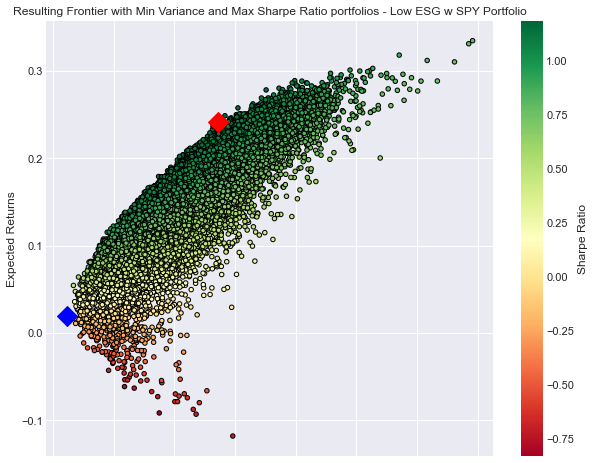

In [41]:
#%% LOW ESG --- Plotting Frontier of Portfolios ---

# Plot the resulting frontier with a scatter plot
sns.set()

# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')

df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)

# optimal portfolio with max Sharpe ratio
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
# minimum variance portfolio
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier with Min Variance and Max Sharpe Ratio portfolios - Low ESG w SPY Portfolio')

plt.show();


#### 6.2 Portfolio Optimisation and Sensitivity Analysis
- 3-Assets Optimiser (i.e. Complete portfolio = Optimal Risky Portfolio + Risk Free Asset) <br>  
- Optimal Risky Portfolio = Max Sharpe Ratio Portfolio + Market Portfolio

#### (a) HIGH ESG <br> (b) LOW ESG



#### Perform sensitivity analysis on different degree of risk aversion: <br> (1) Low <br> (2) Mid <br> (3) High

In [42]:
# call out Risk Aversion set earlier
# [Low, Mid, High]
print('Risk aversion levels (Low, Mid, High):', A)
print('\n')

# Call out risk free rate defined earlier
print("Average risk free rate:", round(rf, 4))

Risk aversion levels (Low, Mid, High): [6, 8, 10]


Average risk free rate: 0.0225


#### 6.2 (a) HIGH ESG: 3-Assets Optimiser

In [43]:
#%% 3-Asset Optimizer [HESG (Max Sharpe) with risk free]

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(hesgwspy_stats_sharpe['Returns'])
std_dev_p = float(hesgwspy_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)
    
    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p) 

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level 
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}


#### Obtain Max Utility for various risk aversion levels

In [44]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1184


Max utility for Risk aversion (Mid): 0.0946


Max utility for Risk aversion (High): 0.0802


#### Compute risk premium of Max Sharpe Ratio Portfolio (High ESG)

In [45]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.1844


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 6.2 (a) (1) HIGH ESG: 3-Assets Optimiser with Low Risk Aversion

In [46]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)


Weight in risky portfolio (Low A): 1
Weight in risk free asset (Low A): 0


Expected return of Complete Portfolio (Low A): 0.2069
SD of Complete Portfolio (Low A): 0.1718
Sharpe Ratio of Complete Portfolio (Low A): 1.0735


,Weight in Complete Portfolio (Low A)
CSCO,0.2194
DIS,0.3525
ICLN,0.0037
EQIX,0.3508
VIXM,0.0114
SPY,0.0622


##### 6.2 (a) (2) HIGH ESG: 3-Assets Optimiser with Mid Risk Aversion

In [47]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1
    
print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)

Weight in risky portfolio (Mid A): 0.7812
Weight in risk free asset (Mid A): 0.2188


Expected return of Complete Portfolio (Mid A): 0.1666
SD of Complete Portfolio (Mid A): 0.1342
Sharpe Ratio of Complete Portfolio (Mid A): 1.0739


,Weight in Complete Portfolio (Mid A)
CSCO,0.1714
DIS,0.2753
ICLN,0.0029
EQIX,0.2740
VIXM,0.0089
SPY,0.0486


##### 6.2 (a) (3) HIGH ESG: 3-Assets Optimiser with High Risk Aversion

In [48]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1
    
print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')    

# Expected Return 
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in hesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA * float(hesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = hesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)

Weight in risky portfolio (High A): 0.625
Weight in risk free asset (High A): 0.375


Expected return of Complete Portfolio (High A): 0.1377
SD of Complete Portfolio (High A): 0.1074
Sharpe of Complete Portfolio (High A): 1.0728


,Weight in Complete Portfolio (High A)
CSCO,0.1371
DIS,0.2203
ICLN,0.0023
EQIX,0.2192
VIXM,0.0071
SPY,0.0389


In [49]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
hesg_3asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(hesg_3asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('High ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4))


High ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0802,0.0946,0.1184
weight_risky_portfolio,0.6250,0.7812,1.0000
weight_risk_free,0.3750,0.2188,0.0000
return,0.1377,0.1666,0.2069
standard_deviation,0.1074,0.1342,0.1718
sharpe_ratio,1.0728,1.0739,1.0735


#### 6.2 (b) LOW ESG: 3-Assets Optimiser

In [50]:
#%% 3-Asset Optimizer (LESG (Max Sharpe) with risk free) 

# Create empty lists to store returns, volatility, utility values and weights of imaginary portfolios
port_returns = []
port_volatility = []

port_utility_lowA = []
port_utility_midA = []
port_utility_highA = []

riskyport_weights = []


# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000

exp_ret_p = float(lesgwspy_stats_sharpe['Returns'])
std_dev_p = float(lesgwspy_stats_sharpe['Volatility'])

A = A


# We start with 0% investment in risky portfolio
weight_p = 0.00 


# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    
    utility_lowA = round(returns - 0.5* A[0] *std_dev*std_dev, 4)
    utility_midA = round(returns - 0.5* A[1] *std_dev*std_dev, 4)
    utility_highA = round(returns - 0.5* A[2] *std_dev*std_dev, 4)

    # We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    
    port_returns.append(returns)
    port_volatility.append(std_dev)
    
    port_utility_lowA.append(utility_lowA)
    port_utility_midA.append(utility_midA)
    port_utility_highA.append(utility_highA)
    
    riskyport_weights.append(weight_p)     

# Create a dictionary for weight in risky portfolio, returns, risk, 
# and Utility values of each complete portfolio at different risk aversion level  
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility,
             'Utility Low A': port_utility_lowA,
             'Utility Mid A': port_utility_midA,
             'Utility High A': port_utility_highA}


#### Obtain Max Utility for various risk aversion levels

In [51]:
# Use max() to obtain the maximum utility value and round up to 4 d.p.
# Risk aversion = Low
util_lowA_max = round(max(port_utility_lowA), 4)
print('Max utility for Risk aversion (Low):', util_lowA_max)
print('\n')

# Risk aversion = Mid
util_midA_max = round(max(port_utility_midA), 4)
print('Max utility for Risk aversion (Mid):', util_midA_max)
print('\n')

# Risk aversion = High
util_highA_max = round(max(port_utility_highA), 4)
print('Max utility for Risk aversion (High):', util_highA_max)

Max utility for Risk aversion (Low): 0.1386


Max utility for Risk aversion (Mid): 0.1099


Max utility for Risk aversion (High): 0.0925


#### Compute risk premium of Max Sharpe Ratio Portfolio (Low ESG)

In [52]:
# Risk premium for Max Sharpe ratio portfolio
risk_premium = exp_ret_p - rf
print('Risk premium for Max Sharpe ratio portfolio:', round(risk_premium, 4))

Risk premium for Max Sharpe ratio portfolio: 0.2197


#### Compute:
- Optimal weight in risky portfolio
- Weight in risk free asset
- Expected return of Complete portfolio
- Standard Deviation (ie risk) of Complete portfolio
- Sharpe Ratio of Complete portfolio

##### 6.2 (b) (1) LOW ESG: 3-Assets Optimiser with Low Risk Aversion

In [53]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_lowA = round(risk_premium/(A[0]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_lowA > 1:
    optimal_weight_risky_lowA = 1
    
print("Weight in risky portfolio (Low A):", optimal_weight_risky_lowA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_lowA = round(1 - optimal_weight_risky_lowA, 4)
print("Weight in risk free asset (Low A):", optimal_weight_rf_lowA)
print('\n')

# Expected Return
optimal_exp_return_lowA = round(optimal_weight_risky_lowA*exp_ret_p + (1-optimal_weight_risky_lowA)*rf, 4)
print("Expected return of Complete Portfolio (Low A):", optimal_exp_return_lowA)

# Standard Deviation
optimal_std_dev_lowA = round(optimal_weight_risky_lowA*std_dev_p, 4)
print("SD of Complete Portfolio (Low A):", optimal_std_dev_lowA)

# Sharpe ratio
optimal_sharpe_ratio_lowA = round((optimal_exp_return_lowA-rf)/optimal_std_dev_lowA, 4)
print("Sharpe Ratio of Complete Portfolio (Low A):", optimal_sharpe_ratio_lowA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_lowA * float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_lowA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Low A)'])    
display(weight_securities_risky_lowA)


Weight in risky portfolio (Low A): 1
Weight in risk free asset (Low A): 0


Expected return of Complete Portfolio (Low A): 0.2422
SD of Complete Portfolio (Low A): 0.1858
Sharpe Ratio of Complete Portfolio (Low A): 1.1826


,Weight in Complete Portfolio (Low A)
FTNT,0.1107
NFLX,0.1305
MCHI,0.0209
SBAC,0.6199
VIXM,0.0150
SPY,0.1031


##### 6.2 (b) (2) LOW ESG: 3-Assets Optimiser with Mid Risk Aversion

In [54]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_midA = round(risk_premium/(A[1]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_midA > 1:
    optimal_weight_risky_midA = 1

print("Weight in risky portfolio (Mid A):", optimal_weight_risky_midA) 

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_midA = round(1 - optimal_weight_risky_midA, 4) 
print("Weight in risk free asset (Mid A):", optimal_weight_rf_midA)
print('\n')

# Expected Return 
optimal_exp_return_midA = round(optimal_weight_risky_midA*exp_ret_p + (1-optimal_weight_risky_midA)*rf, 4)
print("Expected return of Complete Portfolio (Mid A):", optimal_exp_return_midA)

# Standard Deviation
optimal_std_dev_midA = round(optimal_weight_risky_midA*std_dev_p, 4)
print("SD of Complete Portfolio (Mid A):", optimal_std_dev_midA)

# Sharpe ratio
optimal_sharpe_ratio_midA = round((optimal_exp_return_midA-rf)/optimal_std_dev_midA, 4)
print("Sharpe Ratio of Complete Portfolio (Mid A):", optimal_sharpe_ratio_midA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_midA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_midA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                            columns = ['Weight in Complete Portfolio (Mid A)'])    
display(weight_securities_risky_midA)


Weight in risky portfolio (Mid A): 0.7954
Weight in risk free asset (Mid A): 0.2046


Expected return of Complete Portfolio (Mid A): 0.1972
SD of Complete Portfolio (Mid A): 0.1478
Sharpe Ratio of Complete Portfolio (Mid A): 1.1822


,Weight in Complete Portfolio (Mid A)
FTNT,0.0880
NFLX,0.1038
MCHI,0.0166
SBAC,0.4931
VIXM,0.0119
SPY,0.0820


##### 6.2 (b) (3) LOW ESG: 3-Assets Optimiser with High Risk Aversion

In [55]:
# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky_highA = round(risk_premium/(A[2]*std_dev_p*std_dev_p), 4)

# if weight assigned to risky portfolio > than 1, max amount to risky portfolio = 1
if optimal_weight_risky_highA > 1:
    optimal_weight_risky_highA = 1

print("Weight in risky portfolio (High A):", optimal_weight_risky_highA)

# Compute Complete Portfolio's:

# optimal weight in risk free asset
optimal_weight_rf_highA = round(1 - optimal_weight_risky_highA, 4) 
print("Weight in risk free asset (High A):", optimal_weight_rf_highA)
print('\n')
    
# Expected Return 
optimal_exp_return_highA = round(optimal_weight_risky_highA*exp_ret_p + (1-optimal_weight_risky_highA)*rf, 4)
print("Expected return of Complete Portfolio (High A):", optimal_exp_return_highA)

# Standard Deviation
optimal_std_dev_highA = round(optimal_weight_risky_highA*std_dev_p, 4)
print("SD of Complete Portfolio (High A):", optimal_std_dev_highA)

# Sharpe ratio
optimal_sharpe_ratio_highA = round((optimal_exp_return_highA-rf)/optimal_std_dev_highA, 4)
print("Sharpe of Complete Portfolio (High A):", optimal_sharpe_ratio_highA)

# fraction invested in respective securities
port_weight_securities = []

for weight in lesg_sharpe_portfolio_weights:
    weight_securities = round(optimal_weight_risky_highA* float(lesg_sharpe_portfolio_weights[weight]), 4)
    port_weight_securities.append(weight_securities)

weight_securities_risky_highA = pd.DataFrame(port_weight_securities, index = lesg_list, 
                                             columns = ['Weight in Complete Portfolio (High A)'])    
display(weight_securities_risky_highA)


Weight in risky portfolio (High A): 0.6364
Weight in risk free asset (High A): 0.3636


Expected return of Complete Portfolio (High A): 0.1623
SD of Complete Portfolio (High A): 0.1182
Sharpe of Complete Portfolio (High A): 1.1829


,Weight in Complete Portfolio (High A)
FTNT,0.0704
NFLX,0.0830
MCHI,0.0133
SBAC,0.3945
VIXM,0.0095
SPY,0.0656


In [56]:
# Create a dictionary to store max utility values, optimal weight in risky portfolio
lesg_3asset_sharpe = {'HighA':[util_highA_max, optimal_weight_risky_highA, optimal_weight_rf_highA, 
                              optimal_exp_return_highA, optimal_std_dev_highA, optimal_sharpe_ratio_highA],
                      'MidA':[util_midA_max, optimal_weight_risky_midA, optimal_weight_rf_midA,
                             optimal_exp_return_midA, optimal_std_dev_midA, optimal_sharpe_ratio_midA],
                      'LowA': [util_lowA_max, optimal_weight_risky_lowA, optimal_weight_rf_lowA, 
                              optimal_exp_return_lowA, optimal_std_dev_lowA, optimal_sharpe_ratio_lowA]}

# Convert into dictionary into a dataframe
tempdf = pd.DataFrame(lesg_3asset_sharpe,
                      index=['max_utility', 'weight_risky_portfolio', 'weight_risk_free', 'return', 
                             'standard_deviation', 'sharpe_ratio'])

print('Low ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:')
display(round(tempdf, 4)) 

Low ESG Portfolio w SPY (Max Sharpe Ratio) with risk free:


,HighA,MidA,LowA
max_utility,0.0925,0.1099,0.1386
weight_risky_portfolio,0.6364,0.7954,1.0000
weight_risk_free,0.3636,0.2046,0.0000
return,0.1623,0.1972,0.2422
standard_deviation,0.1182,0.1478,0.1858
sharpe_ratio,1.1829,1.1822,1.1826
